In [16]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Import Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [13]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
select_june = '06'
june_filter = session.query(Measurement.date, Measurement.tobs).\
    filter (func.strftime("%m", Measurement.date) == select_june).all()

In [14]:
#  3. Convert the June temperatures to a list.
type(june_filter)

list

In [18]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_filter, columns=['date', 'temp'])
june_df.head()

,date,temp
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0


In [20]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,temp
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [22]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
select_dec = '12'
dec_filter = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == select_dec).all()

In [23]:
# 7. Convert the December temperatures to a list.
type(dec_filter)

list

In [24]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_filter, columns=['date', 'temp'])
dec_df.head()

,date,temp
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0


In [26]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:>

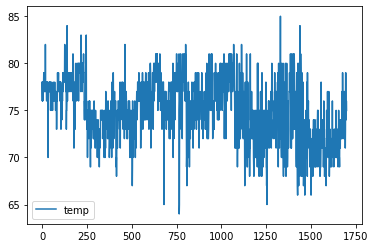

In [27]:
# Extra query #1
june_df.plot()

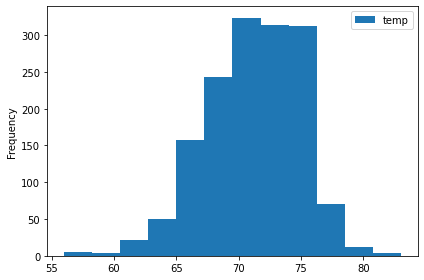

In [28]:
# Extra query #2
dec_df.plot.hist(bins=12)
plt.tight_layout()